# Load throughput

- Author : Sylvie Dagoret-Campagne
- creation date : 2023-12-11
- affiliation : IJCLab/IN2P3/CNRS

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams['legend.fontsize']=  12
plt.rcParams['font.size'] = 12

In [3]:
from spectractor.simulation.throughput import load_transmission,plot_transmission_simple,TelescopeTransmission
from spectractor import parameters
from spectractor.extractor import dispersers
from spectractor.config import load_config,set_logger
import os

In [4]:
import spectractor

In [5]:
#config_path = "~/repos/repos_w_2023_44/Spectractor/config/auxtel.ini"
#config_path = "/home/d/dagoret/repos/repos_w_2023_44/Spectractor/config/auxtel.ini"
config_fullpath = os.path.join(spectractor.__path__[0],"../config/auxtel.ini")
throughput_filename="multispectra_holo4_003_HD142331_20230802_AuxTel_doGainsPTC_v3.0.3_throughput.txt"

### Load config filename for Auxtel

In [6]:
load_config(config_fullpath)

### Throughput

In [7]:
throughput_fullpath = os.path.join(spectractor.__path__[0],parameters.THROUGHPUT_DIR)
throughput_fullfilename = os.path.join(throughput_fullpath,throughput_filename)

In [8]:
lambdas, thr, errthr = load_transmission(throughput_fullfilename) 

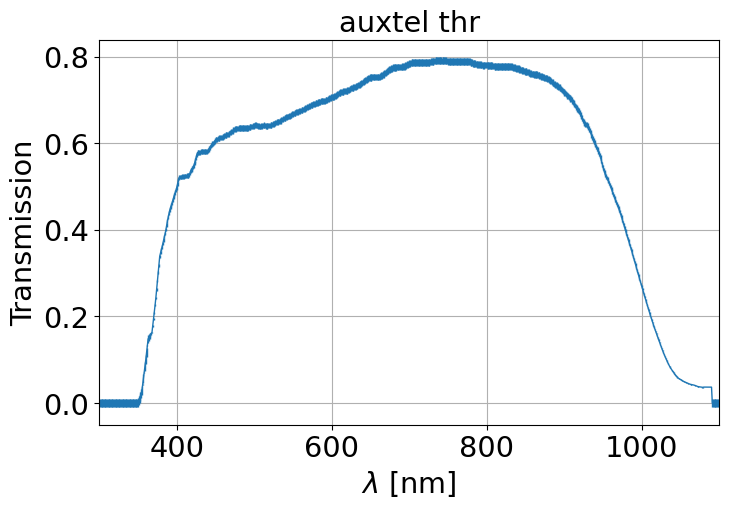

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
plot_transmission_simple(ax, lambdas, thr,  uncertainties=errthr, label="", title="auxtel thr", lw=1)

In [10]:
parameters.THROUGHPUT_DIR = throughput_fullpath 
parameters.OBS_FULL_INSTRUMENT_TRANSMISSON = throughput_filename
print(parameters.THROUGHPUT_DIR )
print(parameters.OBS_FULL_INSTRUMENT_TRANSMISSON)

/home/d/dagoret/repos/repos_w_2023_44/Spectractor/lib/python/spectractor/simulation/AuxTelThroughput/
multispectra_holo4_003_HD142331_20230802_AuxTel_doGainsPTC_v3.0.3_throughput.txt


In [11]:
%matplotlib inline
tel = TelescopeTransmission()
tel.plot_transmission()

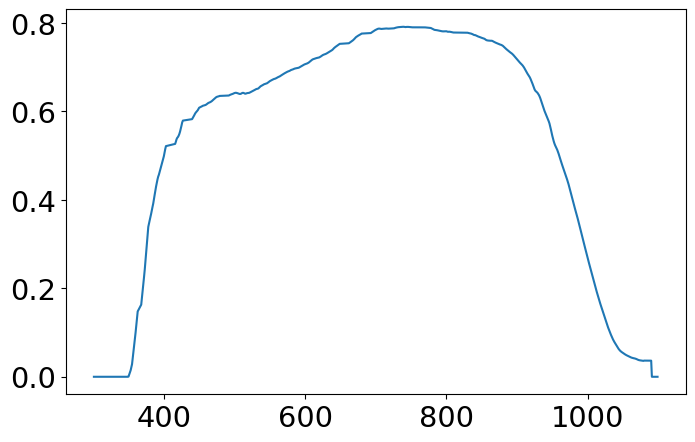

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
ax.plot(lambdas,tel.transmission(lambdas))

In [13]:
disp = dispersers.Hologram("holo4_003")

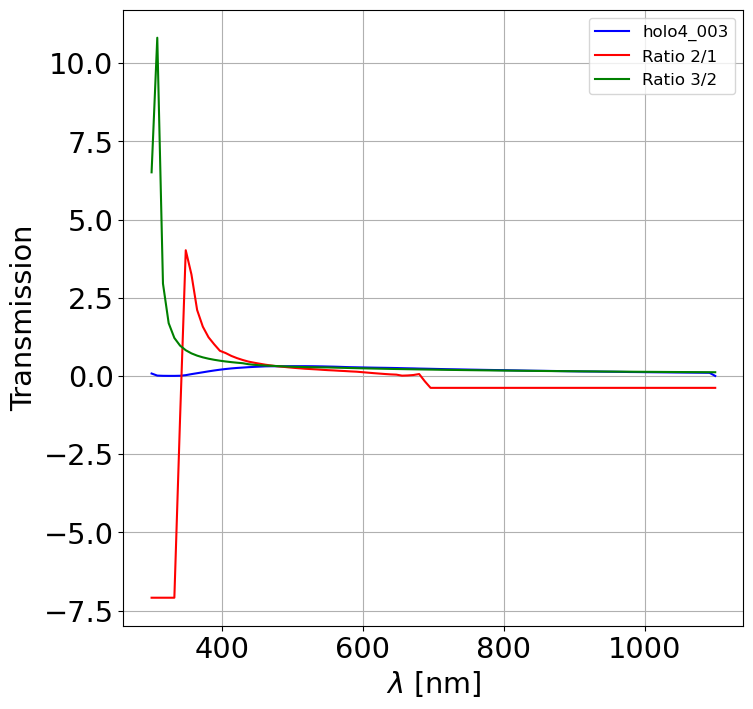

In [14]:
disp.plot_transmission()

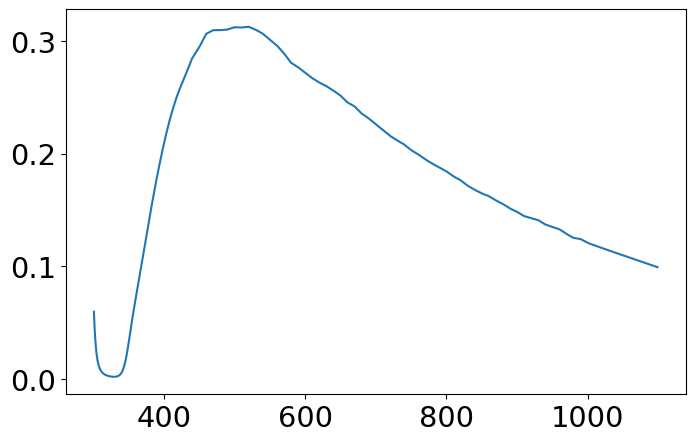

In [15]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
ax.plot(lambdas,disp.transmission(lambdas))